<a href="https://colab.research.google.com/github/phps-28/Data-Science-PGEBM/blob/master/Mestrado/Projeto/Teste_3_Classifica%C3%A7%C3%A3o_de_Imagens_de_Embri%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as libs

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
tf.__version__

'2.14.0'

In [2]:
# Subindo o arquivo zipado
!unzip -q 100.zip
!ls

100  100.zip  sample_data


In [3]:
# Subpastas do arquivo '100'
!ls 100

AA  CB


In [4]:
# Repositório: "AB", "BA", "BB", "BC", "CA",

import os

num_skipped = 0
for folder_name in ("AA", "CB"): # descrevendo as pastas presentes dentro do arquivo main "100"
    folder_path = os.path.join("100", folder_name) # juntando o caminho de cada uma das pastas com o caminho da main pasta(100)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname) # estabelecendo o caminho completo de cada imagem dentro da pasta main e subpastas
        try:
            fobj = open(fpath, "rb") # lendo e abrindo cada uma das imagens
            is_pfif = tf.compat.as_bytes("PFIF") in fobj.peek(10) # verificando a extensão correta das imagens '.png'
        finally:
            fobj.close()

print("Deletadas %d imagens" % num_skipped)

Deletadas 0 imagens


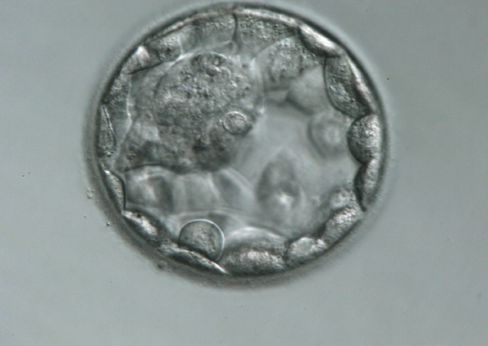

In [5]:
# Visualizando as imagens
tf.keras.preprocessing.image.load_img('/content/100/AA/3AA.1.PNG')

In [6]:
imagem_AA = tf.keras.preprocessing.image.load_img('/content/100/AA/3AA.1.PNG')

In [7]:
type(imagem_AA)

PIL.Image.Image

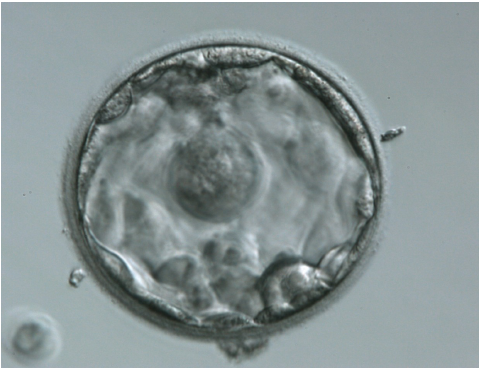

In [9]:
# Visualizando as imagens
tf.keras.preprocessing.image.load_img('/content/100/CB/3CB 1.PNG')

In [8]:
imagem_CB = tf.keras.preprocessing.image.load_img('/content/100/CB/3CB 1.PNG')

In [10]:
type(imagem_CB)

PIL.Image.Image

In [44]:
# Base de Treinamento e Teste
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

dataset_treinamento = gerador_treinamento.flow_from_directory('/content/100',
                                                        target_size = (224, 224),
                                                        batch_size = 11,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 33 images belonging to 2 classes.


In [45]:
dataset_treinamento.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [46]:
dataset_treinamento.class_indices

{'AA': 0, 'CB': 1}

In [47]:
# Construção e Treinamento da Rede Neural

network = Sequential()

# Camadas de Convolução
network.add(Conv2D(32, (3,3), input_shape = (224,224,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

# Camada de Flatten
network.add(Flatten())

# Camadas Densas
network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 3137, activation='relu'))

# Camada de saída
network.add(Dense(units = 2, activation='softmax'))

In [48]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 93312)             0         
                                                                 
 dense_6 (Dense)             (None, 3137)             

In [49]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
historico = network.fit(dataset_treinamento, epochs=300)

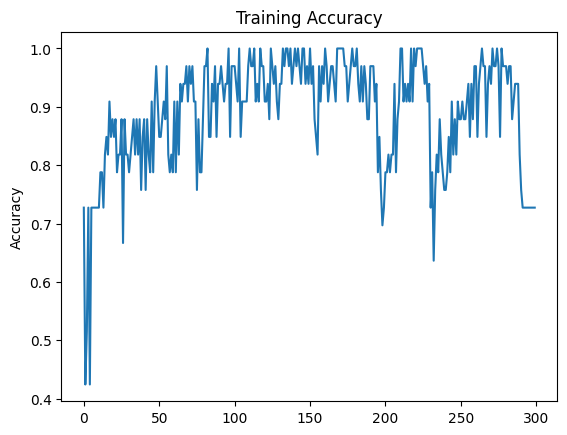

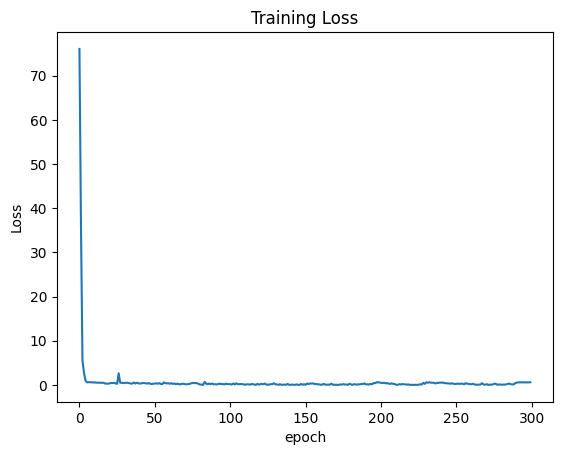

In [51]:
# Avaliando o modelo Treinado

acc = historico.history['accuracy']
loss = historico.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [52]:
# Testando o Novo Modelo
imagem_teste = tf.keras.preprocessing.image.load_img(r'/content/100/CB/4CB 4.PNG', target_size=(224,224))

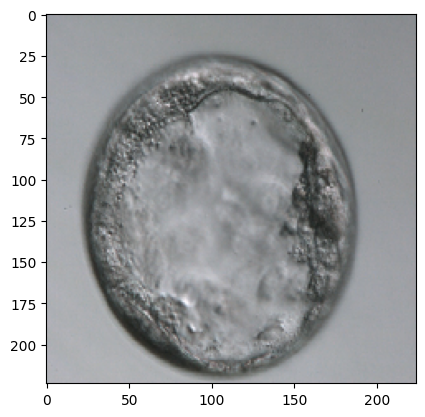

In [53]:
plt.imshow(imagem_teste);

In [54]:
image_test = tf.keras.preprocessing.image.img_to_array(imagem_teste)
np.shape(image_test)

(224, 224, 3)

In [55]:
image_test = np.expand_dims(image_test, axis = 0)
np.shape(image_test)

(1, 224, 224, 3)

In [56]:
predictions = network.predict(image_test)
print(predictions)

1/1 [==============================] - 0s 147ms/step
[[7.291046e-18 1.000000e+00]]


In [57]:
AA = float(predictions[0][0])
CB = float(predictions[0][1])
print(f" {100 * AA:.2f}% AA\n {100 * CB:.2f}% CB.")

 0.00% AA
 100.00% CB.


In [87]:
# Testando o modelo com Imagens mais próximas de AA e de CB
imagem_teste_1 = tf.keras.preprocessing.image.load_img(r'/content/4AB 2.PNG', target_size=(224,224))

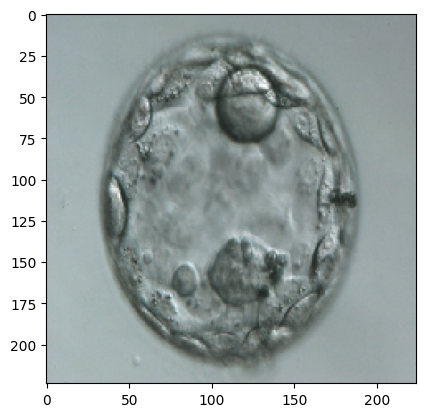

In [88]:
plt.imshow(imagem_teste_1);

In [89]:
# Embrião 4AB
image_test_1 = tf.keras.preprocessing.image.img_to_array(imagem_teste_1)
np.shape(image_test_1)

image_test_1 = np.expand_dims(image_test_1, axis = 0)
np.shape(image_test_1)

predictions_1 = network.predict(image_test_1)

AA = float(predictions_1[0][0]);
CB = float(predictions_1[0][1]);

print('\n Imagem 4AB no expectro entre AA e CB \n')
print(f" {100 * AA:.2f}% AA\n {100 * CB:.2f}% CB.")

1/1 [==============================] - 0s 20ms/step

 Imagem 4AB no expectro entre AA e CB 

 0.00% AA
 100.00% CB.


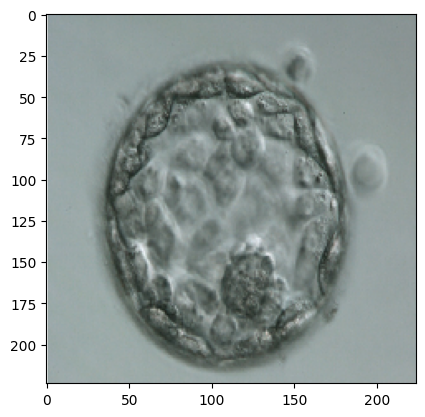

In [73]:
# Testando o modelo com Imagens mais próximas de AA e de CB
imagem_teste_2 = tf.keras.preprocessing.image.load_img(r'/content/4BA 3.PNG', target_size=(224,224))
plt.imshow(imagem_teste_2);

In [74]:
# Embrião 4BA
image_test_2 = tf.keras.preprocessing.image.img_to_array(imagem_teste_2)
np.shape(image_test_2)

image_test_2 = np.expand_dims(image_test_2, axis = 0)
np.shape(image_test_2)

predictions_2 = network.predict(image_test_2)

AA = float(predictions_2[0][0]);
CB = float(predictions_2[0][1]);

print('\n Imagem 4BA no expectro entre AA e CB \n')
print(f" {100 * AA:.2f}% AA\n {100 * CB:.2f}% CB.")

1/1 [==============================] - 0s 20ms/step

 Imagem 4BA no expectro entre AA e CB 

 99.96% AA
 0.04% CB.


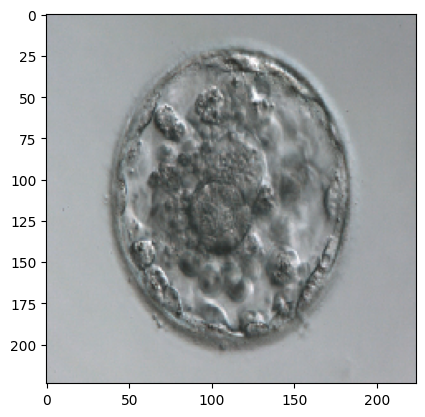

In [75]:
# Testando o modelo com Imagens mais próximas de AA e de CB
imagem_teste_3 = tf.keras.preprocessing.image.load_img(r'/content/4BB 7.PNG', target_size=(224,224))
plt.imshow(imagem_teste_3);

In [76]:
# Embrião 4BB
image_test_3 = tf.keras.preprocessing.image.img_to_array(imagem_teste_3)
np.shape(image_test_3)

image_test_3 = np.expand_dims(image_test_3, axis = 0)
np.shape(image_test_3)

predictions_3 = network.predict(image_test_3)

AA = float(predictions_3[0][0]);
CB = float(predictions_3[0][1]);

print('\n Imagem 4BB no expectro entre AA e CB \n')
print(f" {100 * AA:.2f}% AA\n {100 * CB:.2f}% CB.")

1/1 [==============================] - 0s 21ms/step

 Imagem 4BB no expectro entre AA e CB 

 99.39% AA
 0.61% CB.


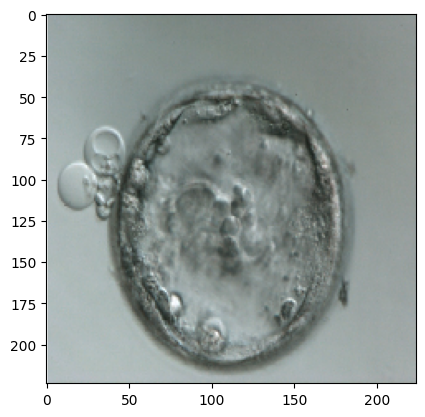

In [77]:
# Testando o modelo com Imagens mais próximas de AA e de CB
imagem_teste_4 = tf.keras.preprocessing.image.load_img(r'/content/4BC 1.PNG', target_size=(224,224))
plt.imshow(imagem_teste_4);

In [78]:
# Embrião 4BC
image_test_4 = tf.keras.preprocessing.image.img_to_array(imagem_teste_4)
np.shape(image_test_4)

image_test_4 = np.expand_dims(image_test_4, axis = 0)
np.shape(image_test_4)

predictions_4 = network.predict(image_test_4)

AA = float(predictions_4[0][0]);
CB = float(predictions_4[0][1]);

print('\n Imagem 4BC no expectro entre AA e CB \n')
print(f" {100 * AA:.2f}% AA\n {100 * CB:.2f}% CB.")

1/1 [==============================] - 0s 21ms/step

 Imagem 4BC no expectro entre AA e CB 

 0.00% AA
 100.00% CB.


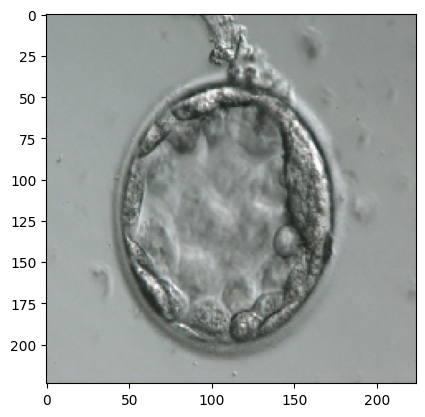

In [79]:
# Testando o modelo com Imagens mais próximas de AA e de CB
imagem_teste_5 = tf.keras.preprocessing.image.load_img(r'/content/4CA 1.PNG', target_size=(224,224))
plt.imshow(imagem_teste_5);

In [80]:
# Embrião 4CA
image_test_5 = tf.keras.preprocessing.image.img_to_array(imagem_teste_5)
np.shape(image_test_5)

image_test_5 = np.expand_dims(image_test_5, axis = 0)
np.shape(image_test_5)

predictions_5 = network.predict(image_test_5)

AA = float(predictions_5[0][0]);
CB = float(predictions_5[0][1]);

print('\n Imagem 4CA no expectro entre AA e CB \n')
print(f" {100 * AA:.2f}% AA\n {100 * CB:.2f}% CB.")

1/1 [==============================] - 0s 20ms/step

 Imagem 4CA no expectro entre AA e CB 

 0.04% AA
 99.96% CB.


## Em Resumo...

Imagem 4AB:

*   0.00% AA
*   100.00% CB

Imagem 4BA:

*   99.96% AA
*   0.04% CB

Imagem 4BB:

*   99.39% AA
*   0.61% CB

Imagem 4BC:

*   0.00% AA
*   100.00% CB

Imagem 4CA:

*   0.04% AA
*   99.96% CB




















<n>

<d>
